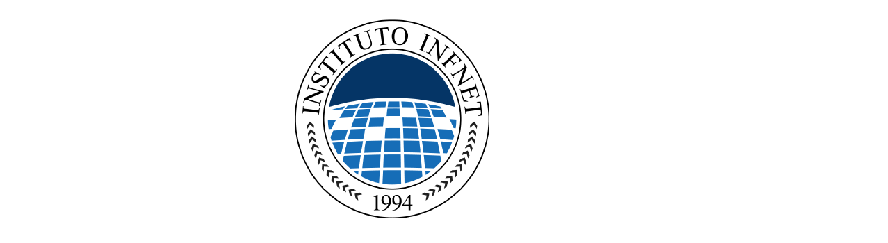

# Etapa 3
### Prof. Jean Cristian Ferreira Machado

# Python com Cloud AWS

## Python connect AWS RDS - PostgreSQL

* https://www.postgresqltutorial.com/postgresql-python/connect/
* https://www.devmedia.com.br/como-criar-uma-conexao-em-postgresql-com-python/34079

In [1]:
!pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import psycopg2

In [3]:
con = psycopg2.connect(
    host="seubanco.seuhost.sa-east-1.rds.amazonaws.com",
    database="bdescola",
    user="postgres",
    password="sua senha")
cur = con.cursor()

In [ ]:
sql = 'create table cidades (id serial primary key, nome varchar(100), uf varchar(2))'
cur.execute(sql)
con.commit()

In [ ]:
con.commit()

In [4]:
sql = "insert into cidades values (default,'São Paulo','SP')"
#sql = "insert into cidades values (default,'Rio de Janeiro','RJ')"
cur.execute(sql)
con.commit()

In [5]:
cur.execute('select * from cidades')
print(cur.fetchall())

[(1, 'Rio de Janeiro', 'RJ'), (2, 'São Paulo', 'SP')]


In [6]:
cur.execute('select * from cidades')
rec = cur.fetchall()
for r in rec:
    print ('Linha:',r)

Linha: (1, 'Rio de Janeiro', 'RJ')
Linha: (2, 'São Paulo', 'SP')


### Leitura de API Rest e Carga no PostgreSQL da AWS RDS
* https://dadosabertos.camara.leg.br/swagger/api.html
* https://dadosaocubo.com/manipulando-dados-em-postgresql-com-python/
* https://www.freecodecamp.org/news/postgresql-in-python/


In [7]:
import requests
import json
import pandas as pd
import psycopg2

In [8]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
resposta   = requests.request("GET", url)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']
#dados

In [11]:
df = pd.DataFrame(dados)
df

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
...,...,...,...,...,...,...,...,...,...
508,160632,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Silva,SOLIDARIEDADE,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zesilva@camara.leg.br
509,220558,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Trovão,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zetrovao@camara.leg.br
510,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zevitor@camara.leg.br
511,160592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zeca Dirceu,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zecadirceu@camara.leg.br


In [12]:
df.columns

Index(['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')

In [14]:
df['nome']

0       Abilio Brunini
1       Acácio Favacho
2          Adail Filho
3      Adilson Barroso
4         Adolfo Viana
            ...       
508           Zé Silva
509          Zé Trovão
510           Zé Vitor
511        Zeca Dirceu
512    Zezinho Barbary
Name: nome, Length: 513, dtype: object

In [15]:
for col in df.columns:
  df[col] = df[col].apply(str)

In [16]:
# Função para criar conexão no banco
def conecta_db():
  con = psycopg2.connect(host='seubanco.seuhost.sa-east-1.rds.amazonaws.com', 
                         database='bdescola',
                         user='postgres', 
                         password='sua senha')
  return con

In [17]:
# Função para criar tabela no banco
def criar_db(sql):
  con = conecta_db()
  cur = con.cursor()
  cur.execute(sql)
  con.commit()
  con.close()

In [18]:
# Dropando a tabela caso ela já exista
sql = 'DROP TABLE IF EXISTS public.deputados'
criar_db(sql)
# Criando a tabela dos deputados
sql = '''CREATE TABLE public.deputados 
      ( id            character varying(10), 
        uri           character varying(100), 
        nome          character varying(500), 
        siglaPartido  character varying(50), 
        uriPartido    character varying(200), 
        siglaUf       character varying(10), 
        idLegislatura character varying(10), 
        urlFoto       character varying(100), 
        email         character varying(100) 
      )'''
criar_db(sql)

In [19]:
# Função para inserir dados no banco
def inserir_db(sql):
    con = conecta_db()
    cur = con.cursor()
    try:
        cur.execute(sql)
        con.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        con.rollback()
        cur.close()
        return 1
    cur.close()

In [20]:
# Inserindo cada registro do DataFrame
for i in df.index:
    sql = """
    INSERT into public.deputados (id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email) 
    values('%s','%s','%s','%s','%s','%s','%s','%s','%s');
    """ % (df['id'][i], df['uri'][i], df['nome'][i], df['siglaPartido'][i], df['uriPartido'][i], df['siglaUf'][i], df['idLegislatura'][i], df['urlFoto'][i], df['email'][i])
    inserir_db(sql)

In [21]:
# Função para consultas no banco
def consultar_db(sql):
    con = conecta_db()
    cur = con.cursor()
    cur.execute(sql)
    recset = cur.fetchall()
    registros = []
    for rec in recset:
        registros.append(rec)
    con.close()
    return registros

In [26]:
# Realizando a consulta no PostegreSQL do AWS RDS
reg = consultar_db('select * from public.deputados')
#reg

In [27]:
# Tranformando os dados da consulta no PostegreSQL em DataFrame
df_bd = pd.DataFrame(reg, columns=['id','uri','nome',
                                   'siglaPartido','uriPartido',
                                   'siglaUf','idLegislatura',
                                   'urlFoto','email'])
df_bd.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [28]:
con.close()

# MongoDB
* https://www.w3schools.com/python/python_mongodb_getstarted.asp

In [29]:
!pip install pymongo

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["mydatabases"]

print(myclient.list_database_names())

['Aula01', 'admin', 'config', 'first', 'indiagreg', 'local', 'mydatabase', 'test', 'training']


In [33]:
# Não lista o banco "mydatabase", pois não tem coleção
print(myclient.list_database_names())

['Aula01', 'admin', 'config', 'first', 'indiagreg', 'local', 'mydatabase', 'test', 'training']


In [34]:
mycol = mydb["customers"]

In [35]:
mydict = { "name": "John", "address": "Highway 37" }

x = mycol.insert_one(mydict)

In [36]:
print(myclient.list_database_names())

['Aula01', 'admin', 'config', 'first', 'indiagreg', 'local', 'mydatabase', 'mydatabases', 'test', 'training']


In [37]:
mycol = mydb["customers"]

x = mycol.find_one()

print(x)

{'_id': ObjectId('63eed30e26d3d0d525ab5cc6'), 'name': 'John', 'address': 'Highway 37'}


In [38]:
myquery = { "address": "Highway 37" }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('63eed30e26d3d0d525ab5cc6'), 'name': 'John', 'address': 'Highway 37'}


# AWS S3
* https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html#using-boto3

In [39]:
!pip install boto3

Defaulting to user installation because normal site-packages is not writeable


https://cicerojmm.medium.com/gerenciamento-de-dados-no-amazon-s3-com-a-utiliza%C3%A7%C3%A3o-de-python-8450e6b988f9

In [40]:
import boto3
from botocore.exceptions import ClientError
import logging

s3_client = boto3.client(
    's3',
    aws_access_key_id='suachave',
    aws_secret_access_key='suachavepublica'
)

In [41]:
# Let's use Amazon S3
s3 = boto3.resource('s3')

In [42]:
# Cria um novo bucket (deve der único mundialmente)
s3_client.create_bucket(
    ACL='private',
    Bucket='jean-cristian-big-data-top', # altere para um nome qualquer
    CreateBucketConfiguration={
        'LocationConstraint': 'sa-east-1'
    },
)

{'ResponseMetadata': {'RequestId': 'GE5RRNZRVVHZT91B',
  'HostId': 'Rmkrfs71ZyS1OVF2AkbyaG91yMzJoGxohnsAiekMtTFY1z1yEDlnm3ACWcmmBuucwiFp9mi8Ckk=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Rmkrfs71ZyS1OVF2AkbyaG91yMzJoGxohnsAiekMtTFY1z1yEDlnm3ACWcmmBuucwiFp9mi8Ckk=',
   'x-amz-request-id': 'GE5RRNZRVVHZT91B',
   'date': 'Fri, 17 Feb 2023 01:10:56 GMT',
   'location': 'http://jean-cristian-big-data-top.s3.amazonaws.com/',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'Location': 'http://jean-cristian-big-data-top.s3.amazonaws.com/'}

In [43]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

infnet-aula-python
infnetbigdata
jean-cristian-big-data
jean-cristian-big-data-top


In [53]:
# Retrieve the list of existing buckets
s3 = boto3.client('s3')
response = s3.list_buckets()
#response

In [47]:
# Output the bucket names
print('Existing buckets:')
for bucket in response['Buckets']:
    print(f'  {bucket["Name"]}')

Existing buckets:
  infnet-aula-python
  infnetbigdata
  jean-cristian-big-data
  jean-cristian-big-data-top


In [48]:
varbucket = 'jean-cristian-big-data-top'

In [49]:
data = open('C:/Users/jean.machado/Pictures/Inf/Inf2.png', 'rb')

In [50]:
data

<_io.BufferedReader name='C:/Users/jean.machado/Pictures/Inf/Inf2.png'>

In [51]:
varbucket

'jean-cristian-big-data-top'

In [56]:
# Realiza upload de arquivo para o S3
#s3.Bucket(varbucket).put_object(Key='Logo_Infnet.jpg', Body=data)
s3.put_object(Bucket=varbucket, Key='Logo_Infnet.jpg', Body=data)

{'ResponseMetadata': {'RequestId': 'DZRAYAYGM79VXPVY',
  'HostId': 'aF4sEHV16Yu7/KLxkSz3zb1MkHV8TbcV40P6REDlMnxyVOykK1j/4WZezZe6trpOQaBpnhr3LWM=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'aF4sEHV16Yu7/KLxkSz3zb1MkHV8TbcV40P6REDlMnxyVOykK1j/4WZezZe6trpOQaBpnhr3LWM=',
   'x-amz-request-id': 'DZRAYAYGM79VXPVY',
   'date': 'Fri, 17 Feb 2023 01:17:00 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"b932dea518f20147eb2d850f051dc9ad"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"b932dea518f20147eb2d850f051dc9ad"',
 'ServerSideEncryption': 'AES256'}

* https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-creating-buckets.html

In [57]:
varbucket

'jean-cristian-big-data-top'

In [58]:
s3_client.download_file(varbucket, "Logo_Infnet.jpg", "arquivolocal.jpg")

In [59]:
d = open("arquivolocal.jpg")
d

<_io.TextIOWrapper name='arquivolocal.jpg' mode='r' encoding='cp1252'>

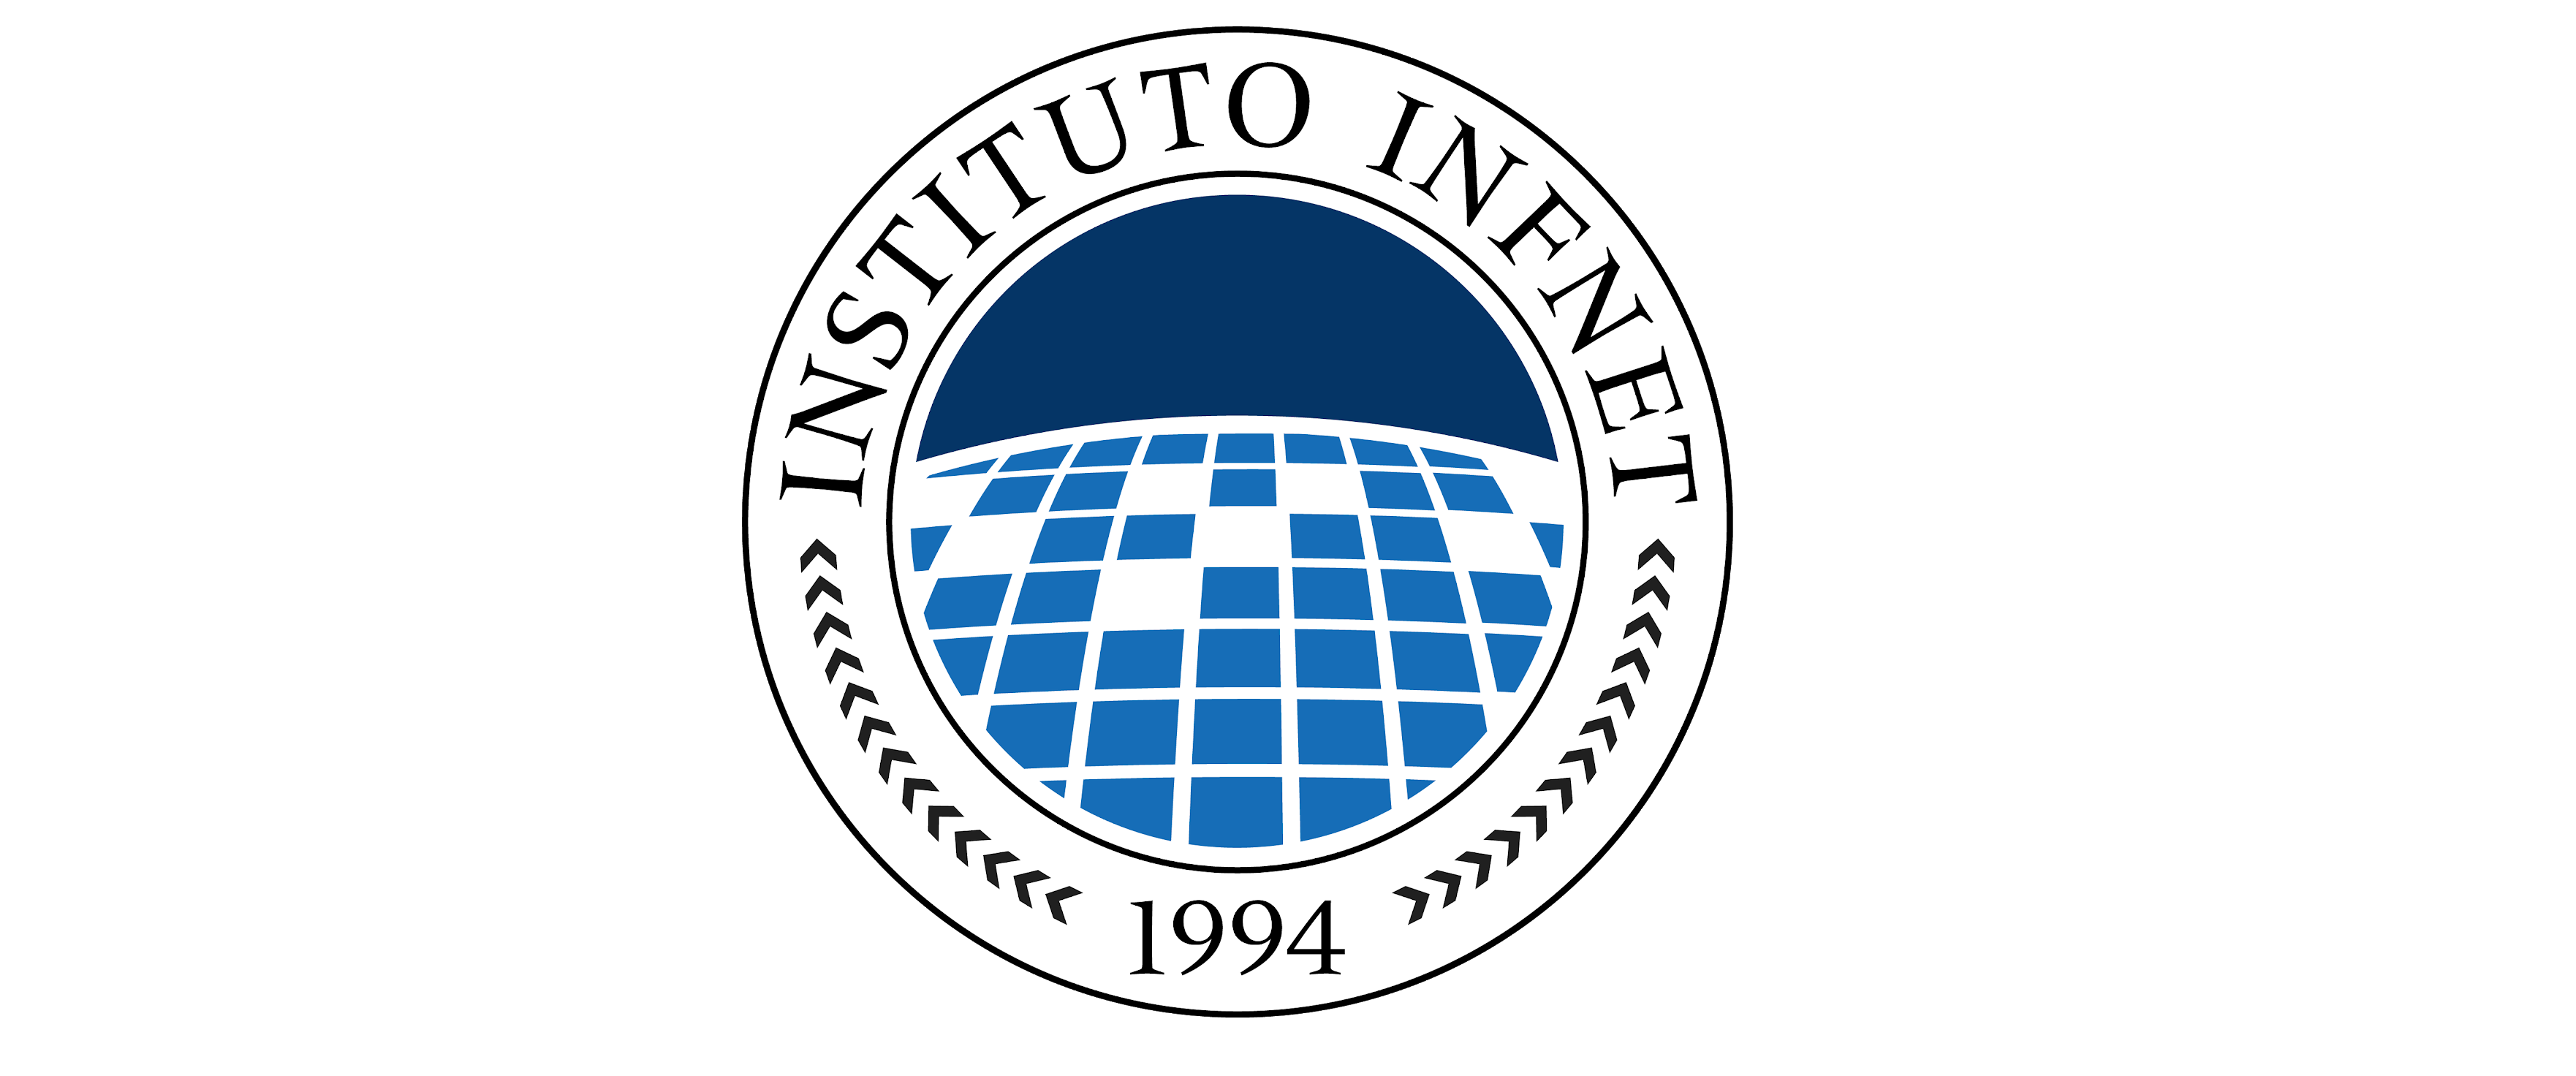

In [60]:
from PIL import Image
img = Image.open("arquivolocal.jpg")
img

# DynamoDB
* https://towardsaws.com/connecting-to-aws-dynamodb-using-boto3-and-python-6e4774588d24
* https://www.analyticsvidhya.com/blog/2022/05/working-with-dynamodb-in-python-using-boto3/

In [61]:
import boto3
import os
import requests
import tqdm

In [62]:
dynamo_client  =  boto3.resource(service_name = 'dynamodb',region_name = 'sa-east-1',
              aws_access_key_id = 'sua chave',
              aws_secret_access_key = 'sua chave pública')

In [63]:
# List the services by a resource
dynamo_client.get_available_subresources()

['Table']

In [64]:
### obtendo a tabela de produtos
tabela_empresa = dynamo_client.Table('escola')
tabela_empresa.table_status
# o table_status retorno ['ACTIVE'] se a tabela foi conectada com sucesso. 
# Se não tente verificar a região dos serviços.

'ACTIVE'

In [66]:
tabela_empresa.put_item(Item = {'idesc':"123","Razão Social":"Infnet"})

{'ResponseMetadata': {'RequestId': 'SMQKE4E99JA75DHS233JIQSFDFVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Fri, 17 Feb 2023 01:29:16 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '2',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'SMQKE4E99JA75DHS233JIQSFDFVV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '2745614147'},
  'RetryAttempts': 0}}

In [67]:
tabela_empresa.put_item(Item = {'idesc':"1234","Razão Social":"Top Intelligence","Cidade":"Rio Bonito"})

{'ResponseMetadata': {'RequestId': 'QF506NDO3EF6PNH5EK7UTVEQJ3VV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Fri, 17 Feb 2023 01:30:06 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '2',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'QF506NDO3EF6PNH5EK7UTVEQJ3VV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '2745614147'},
  'RetryAttempts': 0}}

In [68]:
# Seleção de todas as linhas e atributos
from boto3.dynamodb.conditions import Attr
tabela_empresa.scan(Select = "ALL_ATTRIBUTES")

{'Items': [{'idesc': '2', 'numero': Decimal('3')},
  {'idesc': '1', 'Endereco': 'Rua X'},
  {'idesc': '1234',
   'Cidade': 'Rio Bonito',
   'Razão Social': 'Top Intelligence'},
  {'Razão Social': 'Infnet', 'idesc': '123'}],
 'Count': 4,
 'ScannedCount': 4,
 'ResponseMetadata': {'RequestId': '1CIOBEDVOHOA1O02BJLL42TG6VVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Fri, 17 Feb 2023 01:30:22 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '267',
   'connection': 'keep-alive',
   'x-amzn-requestid': '1CIOBEDVOHOA1O02BJLL42TG6VVV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '2129983795'},
  'RetryAttempts': 0}}

In [69]:
# Seleção com filtro
from boto3.dynamodb.conditions import Attr
tabela_empresa.scan(Select = "ALL_ATTRIBUTES",
                  FilterExpression = Attr("Cidade").eq("Rio Bonito"))

{'Items': [{'idesc': '1234',
   'Cidade': 'Rio Bonito',
   'Razão Social': 'Top Intelligence'}],
 'Count': 1,
 'ScannedCount': 4,
 'ResponseMetadata': {'RequestId': 'A14FGETM69K03EPS4FLPSB4CRFVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Fri, 17 Feb 2023 01:30:48 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '130',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'A14FGETM69K03EPS4FLPSB4CRFVV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '409959489'},
  'RetryAttempts': 0}}

# Redshit
* https://medium.com/codex/aws-redshift-connects-with-python-part-1-setup-a-redshift-connection-with-python-b9f6a1fa49f0
* https://docs.aws.amazon.com/pt_br/redshift/latest/mgmt/python-connect-examples.html
* https://hex.tech/blog/connecting-redshift-python/
* https://pypi.org/project/redshift-connector/

In [70]:
!pip install redshift-connector

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import redshift_connector

ModuleNotFoundError: No module named 'redshift_connector'